In [44]:
# https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [3]:
import pandas as pd

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [5]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [13]:
df.columns = ['A','B','C','D','Target']

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.Target = le.fit_transform(df.Target)
df.head()

,A,B,C,D,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\ac29019\AppData\Local\Continuum\miniconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ac29019\AppData\Local\Continuum\miniconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


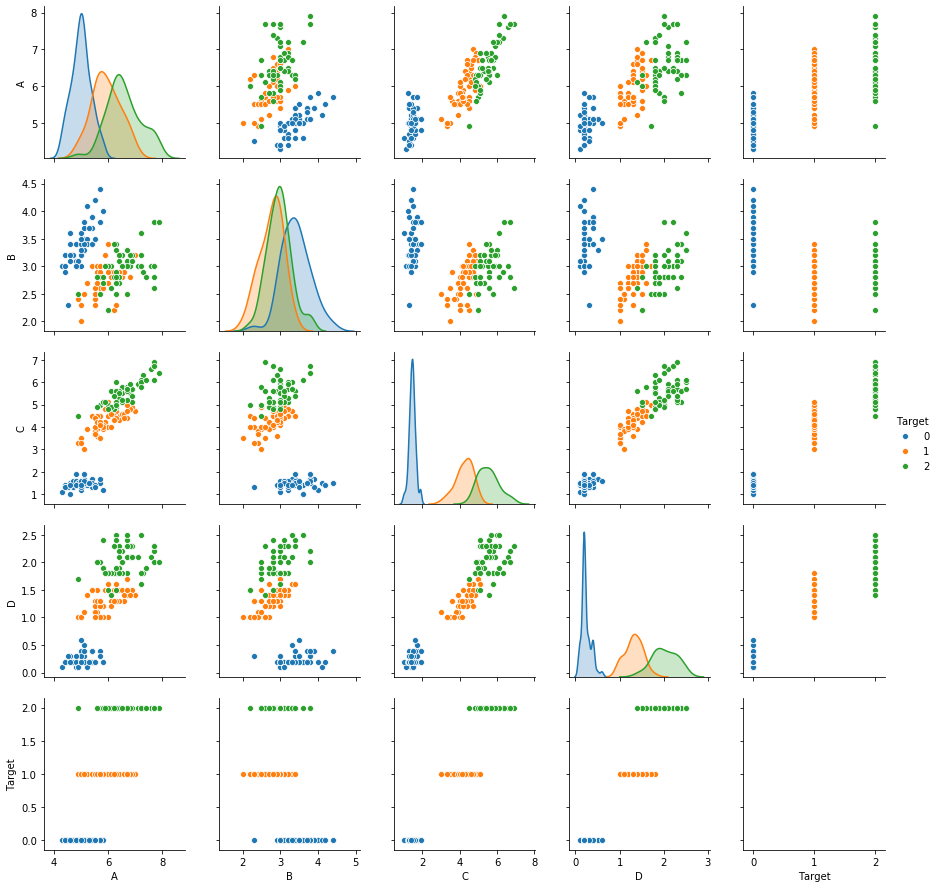

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=df,hue='Target')
plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [27]:
X = df.values[:,0:4].astype('float')
y = df.values[:,4]

In [29]:
y = np_utils.to_categorical(y)

In [41]:
from keras.optimizers import Adam

def define_model():
    model = Sequential()
    model.add(Dense(100, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
    return model

In [42]:
estimator = KerasClassifier(build_fn=define_model, epochs=200, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, shuffle=True)

results = cross_val_score(estimator, X, y, cv=kfold)

print('Baseline: %.2f%% (%.2f%%)' %(results.mean()*100, results.std()*100))

Baseline: 96.67% (6.15%)


In [43]:
model = define_model()

model.fit(X, y, epochs=200, batch_size=5, verbose=0)

model.evaluate(X,y)

150/150 [==============================] - 0s 440us/step


[0.04744199239648874, 0.9800000190734863]

### **Hyper parameter tuning**

In [45]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

from sklearn.model_selection import GridSearchCV

In [ ]:
from keras.optimizers import Adam

def define_model_for_tuning(neurons=1, activation='relu', init_mode='uniform', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X.shape[1], activation=activation, kernel_initializer=init_mode))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
neurons = [10, 50, 100, 200, 300, 500, 1000, 5000]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
batch_size = [5,10,15,20,25,30,50]
epochs = [100,200,300,500,700,900,1300,1500,2000]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid = dict(activation=activation, neurons=neurons, init_mode=init_mode, batch_size=batch_size, epochs=epochs, optimizer=optimizer)

estimator_for_tuning = KerasClassifier(build_fn=define_model_for_tuning, verbose=0)

grid_cv = GridSearchCV(estimator_for_tuning, param_grid=param_grid, n_jobs=-1, cv=10)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

grid_cv_results = grid_cv.fit(X_train, y_train)